# Содержание #
<div>
    <ol>
        <li>
            <a href="#import">Импорт библиотек</a>
        </li>
        <li>
            <a href="#data_load">Изучение данных из файла</a>
        </li>
        <li>
            <a href="#data_prepare">Предобработка данных</a>
        </li>
        <ul>
            <li>
                <a href="#data_column_rename">Переименование столбцов</a>
            </li>
            <li>
                <a href="#data_isna">Обработка пропусков</a>
            </li>
            <li>
                <a href="#data_change_type">Приведение типов</a>
            </li>
            <li>
                <a href="#data_string_prepare">Предобработка строковых значений</a>
            </li>
            <li>
                <a href="data_duplicates">Обработка дубликатов</a>
            </li>
        </ul>
        <li>
            <a href="#calculations">Расчёты и добавление результатов в таблицу</a>
        </li>
        <ul>
            <li>
                <a href="#calc_square_meter_price">Расчет цены квадратного метра</a>
            </li>
            <li>
                <a href="#calc_date">День недели, месяц и год публикации объявления</a>
            </li>
            <li>
                <a href="#calc_flat_floor">Классификация этажей квартиры</a>
            </li>
            <li>
                <a href="#calc_living_ratio">Отношение жилой площади к общей площади</a>
            </li>
            <li>
                <a href="#calc_kitchen_area">Отношение площади кухни к общей площади</a>
            </li>
        </ul>
        <li>
            <a href="#research">Исследовательский анализ данных</a>
        </li>
        <ul>
            <li>
                <a href="#research_hist_area"> Гистограммы площади, стоимости, числа комнат, высоты потолков, длительности продажи</a>
            </li>
            <li>
                <a href="#research_sold_days">Время продажи недвижимости</a>
            </li>
            <li>
                <a href="#research_price_corr">Выявление факторов влияющих на стоимость недвижимости</a>
            </li>
            <li>
                <a href="#research_price_corr_multi">Взаимосвязь стоимости недвижимости c общей площадью, количеством комнат, расстоянием от центра</a>
            </li>
            <li>
                <a href="#research_price_corr_floor">Взаимосвязь стоимости недвижимости c этажом на котором расположена недвижимость</a>
            </li>
            <li>
                <a href="#research_price_corr_weekday">Взаимосвязь стоимости недвижимости c днем продажи недвижимости</a>
            </li>
            <li>
                <a href="#research_price_corr_month">Взаимосвязь стоимости недвижимости c месяцем продажи недвижимости</a>
            </li>
            <li>
                <a href="#research_price_corr_year">Взаимосвязь стоимости недвижимости c годом продажи недвижимости</a>
            </li>
            <li>
                <a href="#research_top_locality">Населенные пункты с наибольшим количеством объявлений/ Средняя стоимость квадратного метра</a>
            </li>
        </ul>
        <li>
            <a href="#research_center">Недвижимость в центре</a>
        </li>
        <ul>
            <li>
                <a href="#research_center_hist">Гистограммы площади, стоимости, числа комнат, высоты потолков, высоты потолков в центре</a>
            </li>
            <li>
                <a href="#research_center_price_corr">Выявление факторов влияющих на стоимость недвижимости в центре</a>
            </li>
            <ul>
                <li>
                    <a href="#research_center_price_corr_multi">Взаимосвязь стоимости недвижимости c общей площадью, количеством комнат, расстоянием от центра</a>
                </li>
                <li>
                    <a href="#research_center_price_corr_floor">Взаимосвязь стоимости недвижимости c этажом на котором расположена недвижимость</a>
                </li>
                <li>
                    <a href="#research_center_price_corr_weekday">Взаимосвязь стоимости недвижимости c днем продажи недвижимости</a>
                </li>
                <li>
                    <a href="#research_center_price_corr_month">Взаимосвязь стоимости недвижимости c месяцем продажи недвижимости</a>
                </li>
                <li>
                    <a href="#research_center_price_corr_year">Взаимосвязь стоимости недвижимости c годом продажи недвижимости</a>
                </li>
            </ul>
        </ul>
        <li>
            <a href="#conclusion">Вывод</a>
        </li>
    </ol>
</div>

<a id='import'></a>
# Импорт библиотек #

In [1]:
from IPython.core.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<a id='data_load'></a>
# Изучение данных из файла #

In [2]:
data = pd.read_csv(filepath_or_buffer='datasets/real_estate_data.csv', delimiter='\t')
display(data)
data.info()
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


# Результат первичного осмотра данных #
1. data['first_day_exposition'] привести к типу datetime
2. data['floors_total'] привести к типу int
3. data['is_apartment'] приветсти к типу bool
4. data['balcony'] привести к типу int
5. data['airport_nearest] привести к типу int
6. data['days_exposition'] привести к типу int
7. data['cityCenter_nearest]:
    - переименовать в 'city_center_nearest'
    - привести к типу int
8. data['parks_around3000']:
    - переименовать в 'parks_around_3000'
    - привести к типу int
9. data['park_nearest'] привести к типу int
10. data['ponds_around3000']
    - переименовать в 'ponds_around3000'
    - привести к типу int
11. data['ponds_nearest'] привести к типу int
12. Пропуски данных:
    - data['ceiling_height']
        * заменить пропуски на медианное значение, т.к. нет косвенных данных указывающих на верное значение
        * медиана слабо зависит от выбросов
    - data['floors_total']
        * заменить пропуски на data['floor'], т.к. нет косвенных данных указывающих на верное значение
    - data['living_area']
        * заменить пропуски на медианное значение, т.к. нет косвенных данных указывающих на верное значение
        * медиана слабо зависит от выбросов
    - data['is_apartment']
        * заменить пропуски на 0
        * если не указано, вероятно не является аппартаментами
    - data['kitchen_area']
        * заменить пропуски на медианное значение, т.к. нет косвенных данных указывающих на верное значение
        * медиана слабо зависит от выбросов
    - data['balcony']
        * заменить пропуски на 0
        * если количество не указано, вероятно балконов нет.
    - data['locality_name']
    - data['airports_nearest']
        * заменить на 0
        * картографические данные
        * если не указано значение => аэропорт рядом отсутствует
    - data['cityCenters_nearest']
        * оставить пропуск
        * картографические данные
        * если не указано => недвижимость расположена за пределами Санкт-Петербурга
    - data['parks_around3000']
        * заменить на 0
        * картографические данные
        * если не указано => парки в радиусе 3 км отсутствуют
    - data['parks_nearest']
        * заменить на 0
        * картографические данные
        * если не указано => парки отсутствуют
    - data['ponds_around3000']
        * заменить на 0
        * картографические данные
        * если не указано => пруды в радиусе 3 км отсутствуют
    - data['ponds_nearest']
        * заменить на 0
        * картографические данные
        * если не указано => парки отсутствуют
    - data['days_exposition']
        * заменить на 0

<a id='data_prepare'></a>
# Предобработка данных #

<a id='data_column_rename'></a>
## Переименование столбцов ##

In [3]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest',
                            'parks_around3000':'parks_around_3000',
                            'ponds_around3000':'ponds_around_3000'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<a id='data_isna'></a>
## Обработка пропусков ##

In [4]:
for column in data.columns:
    if column in ['ceiling_height', 'living_area', 'kitchen_area']:
        data[column] = data[column].fillna(value=data[column].median())
    elif column in ['is_apartment', 'balcony', 'airports_nearest',
                    'parks_around_3000', 'ponds_around_3000',
                    'parks_nearest', 'ponds_nearest','days_exposition']:
        data[column] = data[column].fillna(value=0)
    elif column == 'floors_total':
        data[column] = data[column].where(~data[column].isna(), data['floor'])

In [5]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest           0
city_centers_nearest    5519
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition            0
dtype: int64

In [6]:
data['locality_name'] = data['locality_name'].where(~data['city_centers_nearest'].isnull()
                                                    & ~data['locality_name'].isnull(), 'санкт-петербург')
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'санкт-петербург',
       'посёлок Парголово', 'Ломоносов', 'Петергоф', 'Пушкин', 'Колпино',
       'Кронштадт', 'посёлок Металлострой', 'Павловск', 'Сестрорецк',
       'Красное Село', 'посёлок Понтонный', 'Зеленогорск',
       'посёлок Молодёжное', 'посёлок Стрельна',
       'посёлок Александровская', 'посёлок Песочный',
       'посёлок Петро-Славянка', 'посёлок Репино', 'посёлок Сапёрный',
       'посёлок Щеглово', 'поселок Лисий Нос', 'посёлок Левашово',
       'посёлок Белоостров', 'поселок Мурино', 'посёлок Лисий Нос',
       'посёлок Усть-Ижора'], dtype=object)

In [7]:
print(data.isna().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest    5519
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition            0
dtype: int64


## Результаты обработки пропусков ##
1. явные пропуски обработаны
2. пропуски data['locality_name'] заменены на 'санкт-петербург', если указано расстояние до центра

<a id='data_change_type'></a>
## Приведение типов ##

In [8]:
for column in data.columns:
    if column in ['floors_total', 'balcony', 'airport_nearest', 'days_exposition',
                  'parks_around_3000', 'park_nearest', 'ponds_around_3000', 'ponds_nearest']:
        data[column] = data[column].astype('int')
    elif column in ['is_apartment']: data[column] = data[column].astype('bool')
    elif column in ['first_day_exposition']: data[column] = pd.to_datetime(data[column], format='%Y-%m-%dT%H:%M:%S')
    elif column == 'city_centers_nearest': data[column] = pd.to_numeric(data[column], errors='coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [10]:
data['city_centers_nearest']

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: city_centers_nearest, Length: 23699, dtype: float64

<a id='data_string_prepare'></a>
## Предобработка строковых значений ##

In [11]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.strip()
data['locality_name'] = data['locality_name'].apply(lambda x: x.replace('ё','е')).apply(lambda x: x.replace('поселок ',''))
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'парголово', 'ломоносов', 'петергоф',
       'пушкин', 'колпино', 'кронштадт', 'металлострой', 'павловск',
       'сестрорецк', 'красное село', 'понтонный', 'зеленогорск',
       'молодежное', 'стрельна', 'александровская', 'песочный',
       'петро-славянка', 'репино', 'саперный', 'щеглово', 'лисий нос',
       'левашово', 'белоостров', 'мурино', 'усть-ижора'], dtype=object)

<a id='data_duplicates'></a>
## Обработка дубликатов ##

In [12]:
data.duplicated().sum()

0

# Результаты предобработки данных #
1. переименованы столбцы:
    * cityCenters_nearest => city_centers_nearest
    * parks_around3000 => parks_around_3000
    * ponds_around3000 => ponds_around_3000
2. заполнены пропущенные значения:
    * 'ceiling_height' = 'ceiling_height'.median()
    * 'living_area' = 'living_area'.median()
    * 'kitchen_area' = 'kitchen_area'.median()
    * 'is_apartment' = 0
    * 'balcony' = 0
    * 'airports_nearest' = 0
    * 'city_centers_nearest' = 0
    * 'parks_around_3000' = 0
    * 'ponds_around_3000' = 0
    * 'parks_nearest' = 0
    * 'ponds_nearest' = 0
    * 'days_exposition' = 0
    * 'floors_total' = 'floor'
    * 'locality_name'.isna() = 'санкт-петербург'
3. изменены типы данных:
    * 'floors_total'
    * 'balcony'
    * 'airport_nearest'
    * 'days_exposition'
    * 'city_centers_nearest'
    * 'parks_around_3000'
    * 'park_nearest'
    * 'ponds_around_3000'
    * 'ponds_nearest'
    * 'is_apartment'
    * 'first_day_exposition'
4. предобработка строковых данных:
    * data['locality_name']
        - значения переведены в нижний регистр
        - удалены лишние символы
5. обработка дубликатов:
    * не обнаружены

<a id='calculations'></a>
# Расчёты и добавление результатов в таблицу #

<a id='calc_square_meter_price'></a>
## Расчет цены квадратного метра ##

In [13]:
data['square_meter_price'] = (data['last_price'] / data['total_area']).round(2)
data['square_meter_price']

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: square_meter_price, Length: 23699, dtype: float64

<a id='calc_date'></a>
## День недели, месяц и год публикации объявления ##

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [15]:
data['weekday'] = data['first_day_exposition'].dt.day_name(locale='Russian')
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

<a id='calc_flat_floor'></a>
## Классификация этажей квартиры ##

In [16]:
def floor_classifier(rec):
    if rec['floor'] == 1: return 'Первый'
    elif rec['floor'] == rec['floors_total']: return 'Последний'
    else: return 'Другой'

data['flat_floor'] = data.apply(floor_classifier, axis=1)

<a id='calc_living_ratio'></a>
## Отношение жилой площади к общей площади ##

In [17]:
data['living_ratio'] = (data['living_area'] / data['total_area']).round(2)

<a id='calc_kitchen_area'></a>
## Отношение площади кухни к общей площади ##

In [18]:
data['kitchen_ratio'] = (data['kitchen_area'] / data['total_area']).round(2)

<a id='research'></a>
# Исследовательский анализ данных #

<a id='research_hist_area'></a>
## Гистограммы площади, стоимости, числа комнат, высоты потолков ##

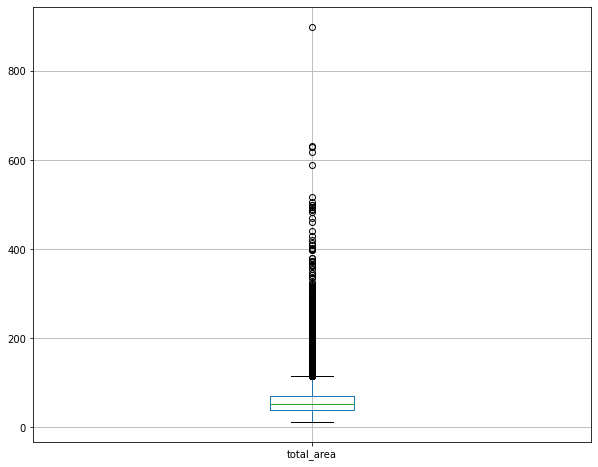

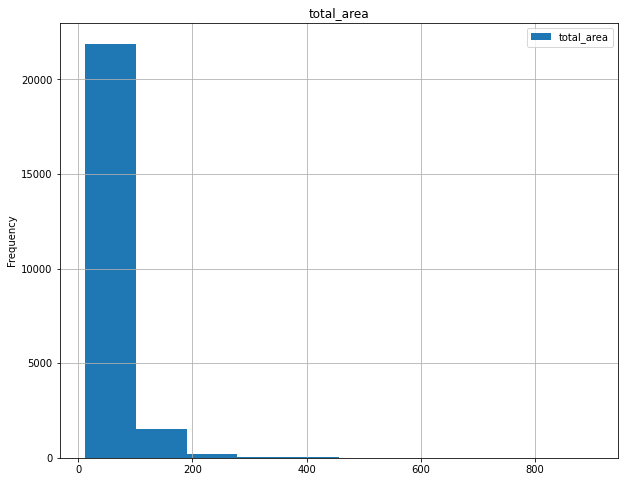

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


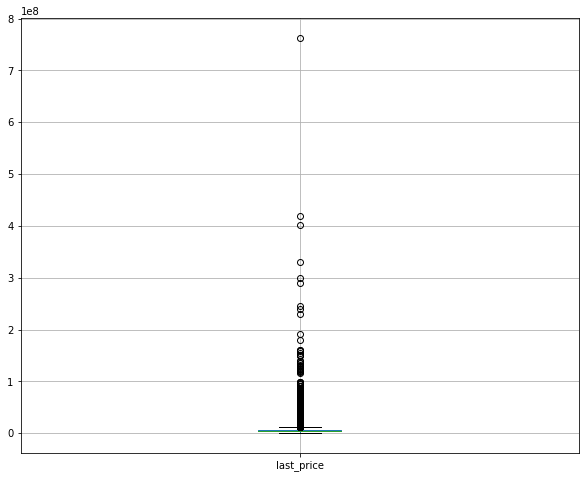

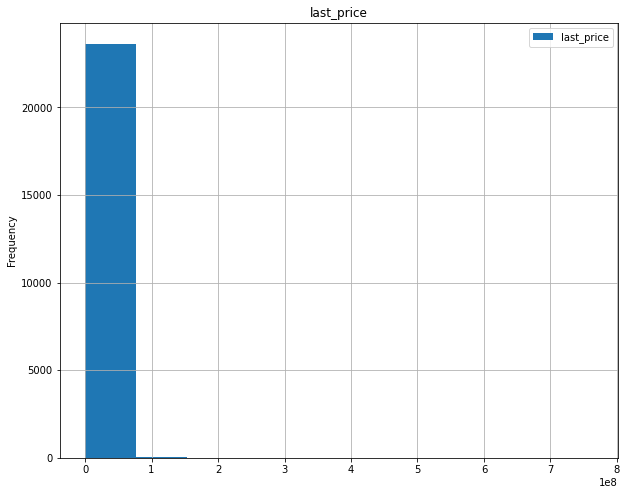

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


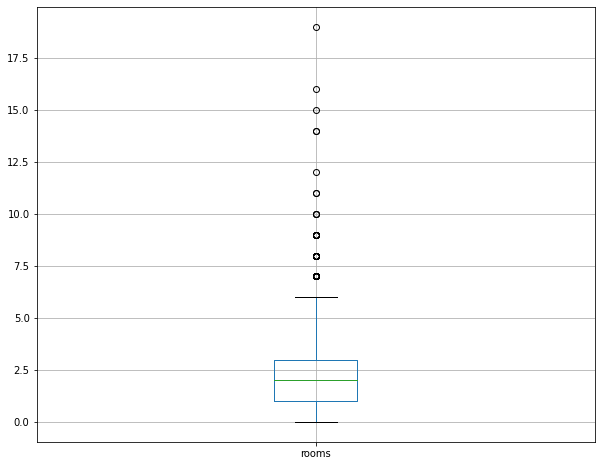

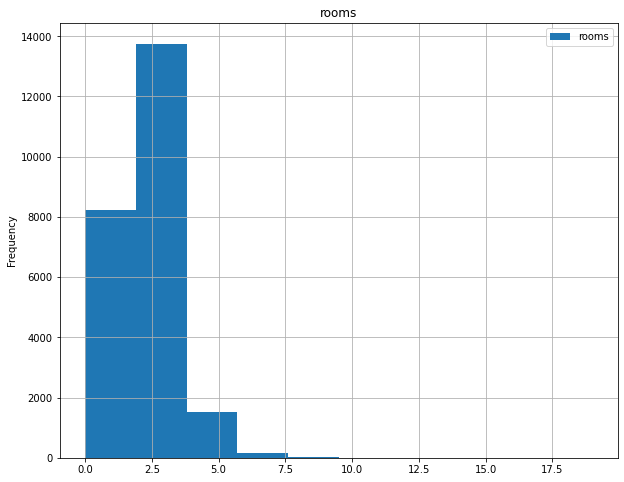

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


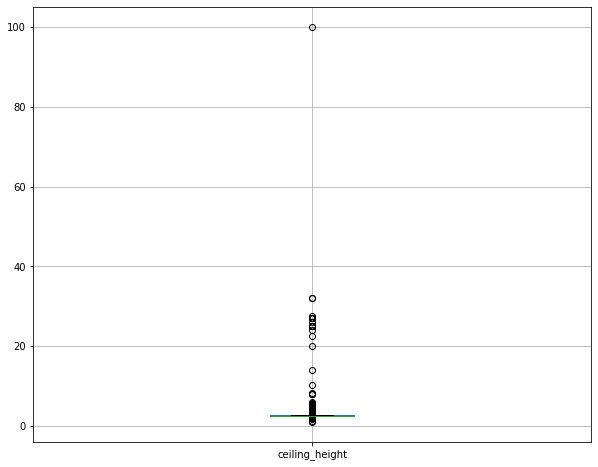

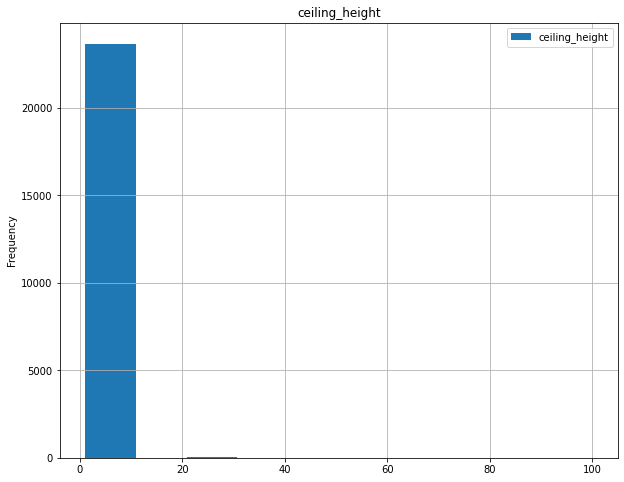

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


In [19]:
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    data.boxplot(column=column, figsize=(10,8))
    plt.show()

    data.plot(kind='hist',
              y=column,
              grid=True,
              title=column,
              figsize=(10,8))
    plt.show()

    print(data[column].describe())

## Результаты исследования гистограмм площади, стоимости, числа комнат, высоты потолков ##
1. Общая площадь:
    * среднее значение площади = 60 м^2
    * медианное значение площади = 52 м^2
    * минимальное значение площади = 12 м^2 - предположительно комната в коммунальной квартире
    * помещения площадью более 450 м^2 в рамках данного исследования будем считать выбросом, т.к. их кол-во не велико, данные полученные в ходе исследования могут быть искажены
2. Стоимость недвижимости:
    * средняя стоимость = 6,5 млн.
    * медианная стоимость = 4,65 млн.
    * минимальная стоимость = 13000
    * недвижиность дешевле 1 млн. в рамках данного исследования будем считать выбросом
    * недвижимость дороже 20 млн. в рамках данного исследования будем считать выбросом
3. Количество комнат:
    * среднее число комнат = 2
    * медианное число комнат = 2
    * минимальное число комнат = 0 - студии
    * помещения количество комнат в которых более 8 в рамках данного исследования будем считать выбросом
4. Высота потолков:
    * средняя высота = 2.73 м
    * медианная высота = 2.65 м
    * минимальная высота = 1 м
    * помещения с высотой потолка менее 2,5 м в рамках данного исследования будем считать выбросом
    * помещения с высотой потолка менее 5 м в рамках данного исследования будем считать выбросом

<a id='research_sold_days'></a>
## Время продажи недвижимости ##

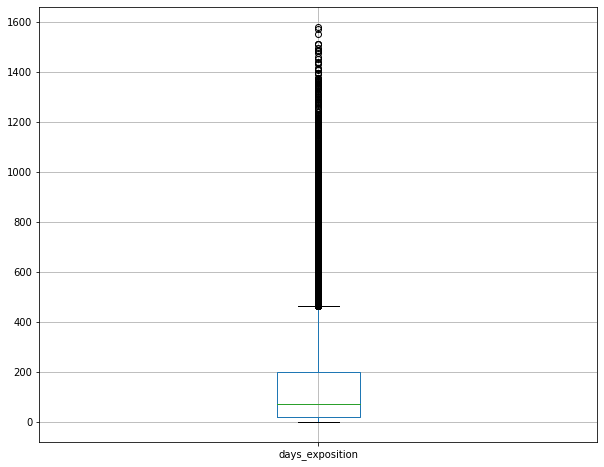

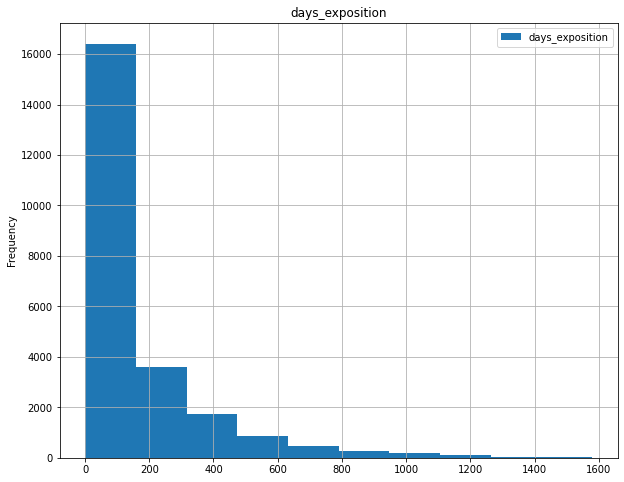

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [20]:
data.boxplot(column='days_exposition', figsize=(10,8))
plt.show()

data.plot(kind='hist',
          y='days_exposition',
          grid=True,
          title='days_exposition',
          figsize=(10,8))
plt.show()
print(data['days_exposition'].describe())

## Результат изучения длительности продажи недвижимости ##
1. среднее время продажи недвижимости = 157 дней
2. медианное время продажи недвижимости = 73 дня
3. нормальным временем продажи недвижимости можно считать продажу от 22 до 213 дней.
4. быстрой продажей можно считать продажу длительностью до 22 дней.
5. долгой можно считать продажу длительностью более 213 дней
6. data['days_exposition'] = 0 в дальнейшем не рассматривать, т.к. данная недвижимость еще не продана

<a id='research_price_corr'></a>
## Выявление факторов влияющих на стоимость недвижимости ##

In [21]:
data_view = data.query('(total_area <= 450) '
                       'and (10**6 <= last_price <= 20**6) '
                       'and (rooms < 15) '
                       'and (2.5 <= ceiling_height <= 5)')

print((data.shape[0] - data_view.shape[0]) / data.shape[0] )

0.018313008987721


<a id='research_price_corr_multi'></a>
### Взаимосвязь стоимости недвижимости c общей площадью, количеством комнат, расстоянием от центра ###

<AxesSubplot:>

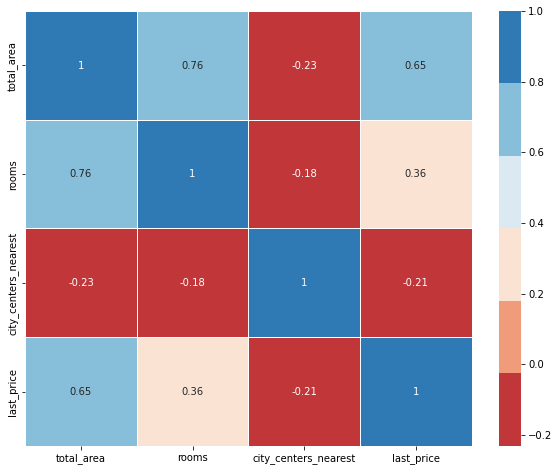

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data=data[['total_area', 'rooms', 'city_centers_nearest', 'last_price']].corr(),
            annot=True,
            cmap= sns.color_palette(palette="RdBu"),
            linewidths=0.5)

<a id='research_price_corr_floor'></a>
### Взаимосвязь стоимости недвижимости c этажом на котором расположена недвижимость ###

In [23]:
floor_price_pivot = data_view.pivot_table(index='flat_floor', values='last_price', aggfunc=['sum','mean'])
floor_price_pivot.columns = ['sum_last_price', 'mean']

<AxesSubplot:xlabel='flat_floor', ylabel='mean'>

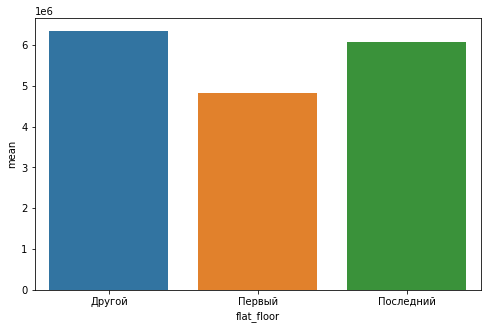

In [24]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=floor_price_pivot.index,
            y=floor_price_pivot['mean'],
            ax=ax)

<a id='research_price_corr_weekday'></a>
### Взаимосвязь стоимости недвижимости c днем продажи недвижимости ###

In [25]:
weekday_price_pivot = data_view.pivot_table(index='weekday', values='last_price', aggfunc=['sum', 'mean'])
weekday_price_pivot.columns = ['sum_last_price', 'mean']

<AxesSubplot:xlabel='weekday', ylabel='mean'>

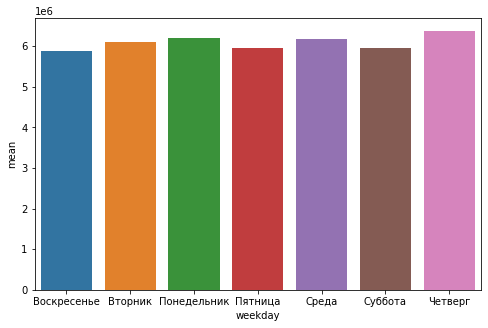

In [26]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=weekday_price_pivot.index,
            y=weekday_price_pivot['mean'],
            ax=ax)

<a id='research_price_corr_month'></a>
### Взаимосвязь стоимости недвижимости c месяцем продажи недвижимости ###

In [27]:
month_price_pivot = data_view.pivot_table(index='month', values='last_price', aggfunc=['sum', 'mean'])
month_price_pivot.columns = ['sum_last_price', 'mean']

<AxesSubplot:xlabel='month', ylabel='mean'>

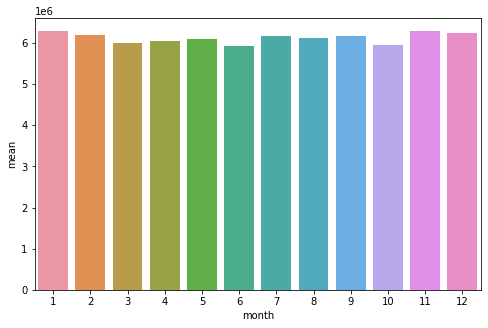

In [28]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=month_price_pivot.index,
            y=month_price_pivot['mean'],
            ax=ax)

<a id='research_price_corr_year'></a>
### Взаимосвязь стоимости недвижимости c годом продажи недвижимости ###

In [29]:
year_price_pivot = data_view.pivot_table(index='year', values='last_price', aggfunc=['sum', 'mean'])
year_price_pivot.columns = ['sum_last_price', 'mean']

<AxesSubplot:xlabel='year', ylabel='mean'>

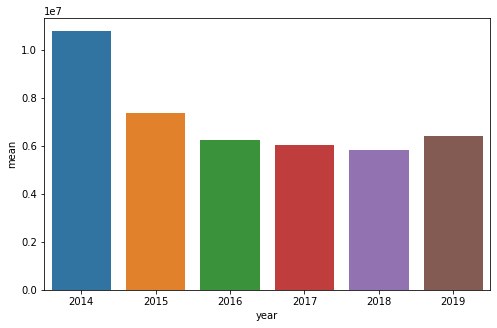

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=year_price_pivot.index,
            y=year_price_pivot['mean'],
            ax=ax)

## Результаты выявления факторов вляющих на стоимость недвижимости ##
1. Связь стоимости недвижимости с общей площадью:
    * наблюдается сильная положительная связь: рост площади ведет к росту стоимости
2. Связь стоимости недвижимости с количеством комнат:
    * наблюдается слабая положительная связь: рост количества ведет к росту стоимости.
    * при этом видна сильная положительная связь количества комнат с общей площадью
3. Связь стоимости недвижимости с расстоянием от центра:
    * наблюдается слабая отрицательная связь: увеличение расстояния ведет к уменьшению стоимости
4. Связь стоимости недвижимости с этажом:
    * недвижимость расположенная на первом этаже дешевле
5. Связь стоимости недвижимости с днем продажи:
    * не обнаружена
6. Связь стоимости недвижимости с месяцем продажи:
    * не обнаружена
7. Связь стоимости недвижимости с годом продажи:
    * с 2014 года стоимость недвижимости снижалась, в 2019 начался замечен небольшой рост стоимости

<a id='research_top_locality'></a>
## Населенные пункты с наибольшим количеством объявлений/ Средняя стоимость квадратного метра ##

In [31]:
for_top_pivot = data_view.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['mean', 'count'])
for_top_pivot.columns = ['mean_price', 'count']
top_10_pivot = for_top_pivot.sort_values(by='count', ascending=False).head(10)
display(top_10_pivot.sort_values(by='mean_price', ascending=False))

,mean_price,count
locality_name,,
пушкин,103091.985616,365
сестрорецк,101757.616831,183
санкт-петербург,100345.110720,20797
парголово,90205.423374,326
петергоф,84757.559602,201
кронштадт,79397.485376,93
шушары,78474.361743,436
колпино,75421.885952,336
ломоносов,72609.797727,132


## Результаты исследования средней стоимости квадратного метра ##
1. Высокая средняя стоимость наблюдается:
    * Пушкин
    * Сестрорецк
    * Санкт-Петербург
2. низкая средняя стоимость наблюдается:
    * Ломоносов
    * Красное Село
    * Колпино

<a id='research_center'></a>
# Недвижимость в центре #

In [32]:
data_view['city_centers_km'] = (data_view['city_centers_nearest'] / 1000).round()

Text(0, 0.5, 'Стоимость квадратного метра')

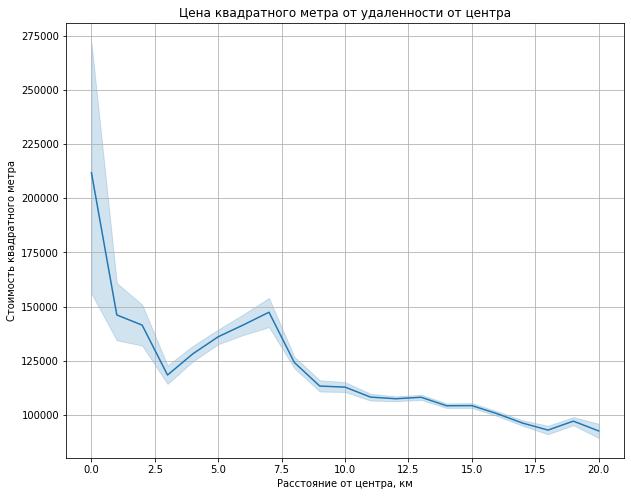

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data=data_view.query('city_centers_km <= 20'),
             x='city_centers_km',
             y='square_meter_price')
plt.grid()
plt.title('Цена квадратного метра от удаленности от центра')
plt.xlabel('Расстояние от центра, км')
plt.ylabel('Стоимость квадратного метра')

In [34]:
data_center = data_view.query('city_centers_km <= 8')

<a id='research_center_hist'></a>
## Гистограммы площади, стоимости, числа комнат, высоты потолков, высоты потолков в центре ##

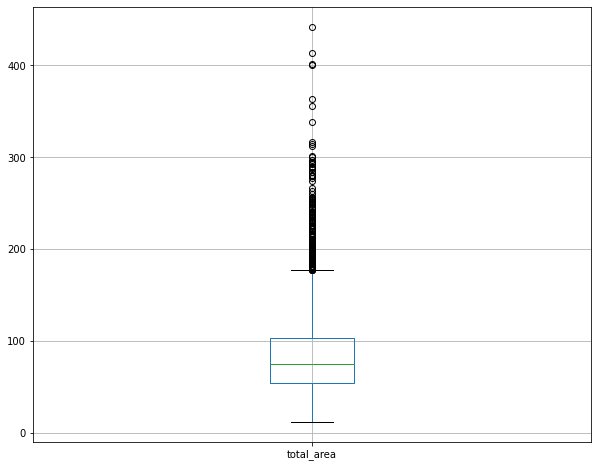

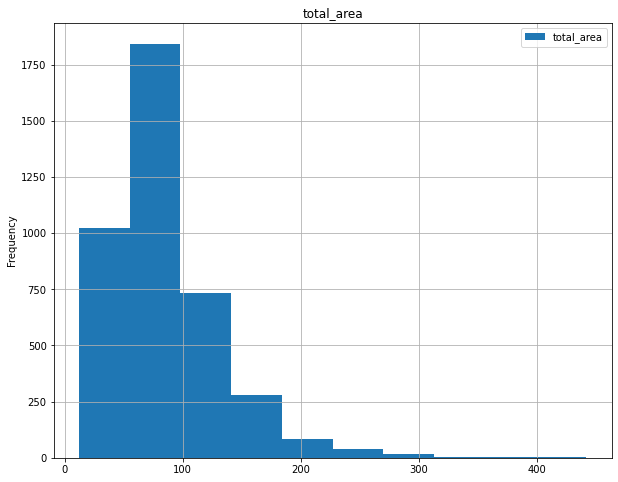

count    4027.000000
mean       85.486412
std        45.636235
min        12.000000
25%        54.300000
50%        75.000000
75%       103.550000
max       441.980000
Name: total_area, dtype: float64


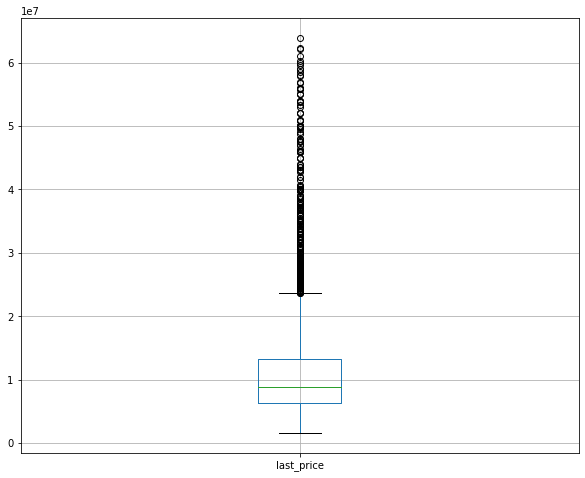

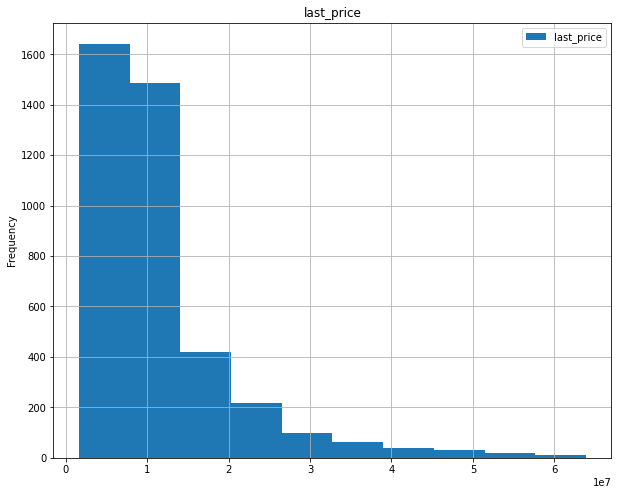

count    4.027000e+03
mean     1.164448e+07
std      8.840268e+06
min      1.600000e+06
25%      6.392400e+06
50%      8.800000e+06
75%      1.330540e+07
max      6.390000e+07
Name: last_price, dtype: float64


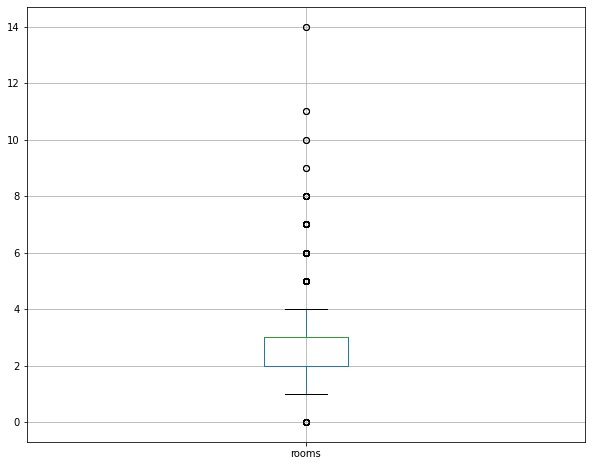

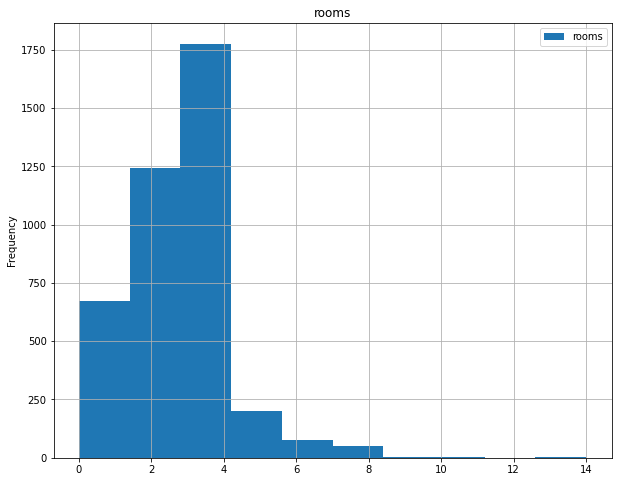

count    4027.000000
mean        2.704495
std         1.329697
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        14.000000
Name: rooms, dtype: float64


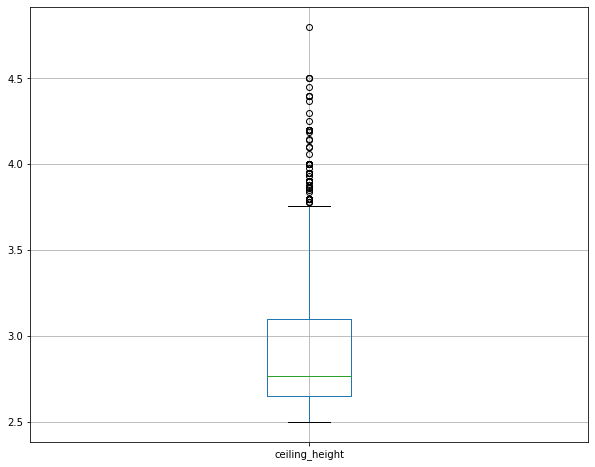

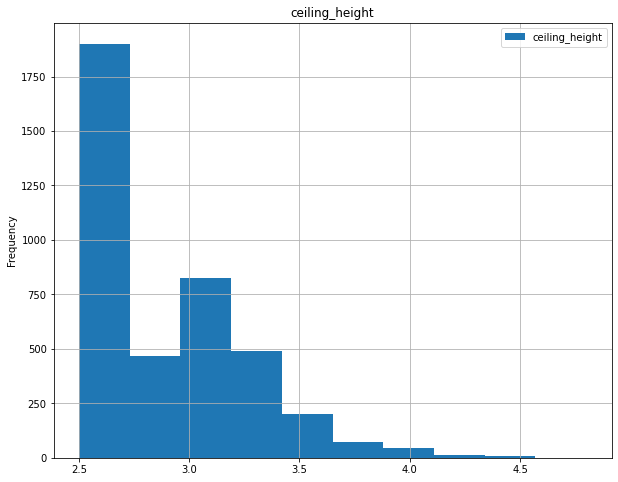

count    4027.000000
mean        2.907363
std         0.336626
min         2.500000
25%         2.650000
50%         2.770000
75%         3.100000
max         4.800000
Name: ceiling_height, dtype: float64


In [35]:
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    data_center.boxplot(column=column, figsize=(10,8))
    plt.show()

    data_center.plot(kind='hist',
                     y=column,
                     grid=True,
                     title=column,
                     figsize=(10,8))
    plt.show()

    print(data_center[column].describe())

## Результаты исследования гистограмм площади, стоимости, числа комнат, высоты потолков ##
1. Общая площадь:
    * среднее значение площади = 89 м^2
    * медианное значение площади = 81 м^2
2. Стоимость недвижимости:
    * средняя стоимость = 11,3 млн.
    * медианная стоимость = 9 млн.
3. Количество комнат:
    * среднее число комнат = 3
    * медианное число комнат = 3
    * минимальное число комнат = 0 - студии
4. Высота потолков:
    * средняя высота = 3 м
    * медианная высота = 3
    * минимальная высота = 2.5 м

<a id='research_center_price_corr'></a>
## Выявление факторов влияющих на стоимость недвижимости в центре ##

<a id='research_center_price_corr_multi'></a>
### Взаимосвязь стоимости недвижимости c общей площадью, количеством комнат, расстоянием от центра ###

<AxesSubplot:>

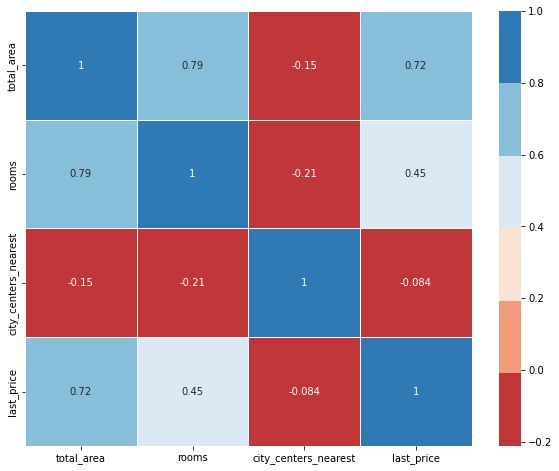

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data=data_center[['total_area', 'rooms', 'city_centers_nearest', 'last_price']].corr(),
            annot=True,
            cmap= sns.color_palette(palette="RdBu"),
            linewidths=0.5)

<a id='research_center_price_corr_floor'></a>
### Взаимосвязь стоимости недвижимости c этажом на котором расположена недвижимость ###

In [37]:
center_floor_price_pivot = data_center.pivot_table(index='flat_floor', values='last_price', aggfunc=['sum','mean'])
center_floor_price_pivot.columns = ['sum_last_price', 'mean']

<AxesSubplot:xlabel='flat_floor', ylabel='mean'>

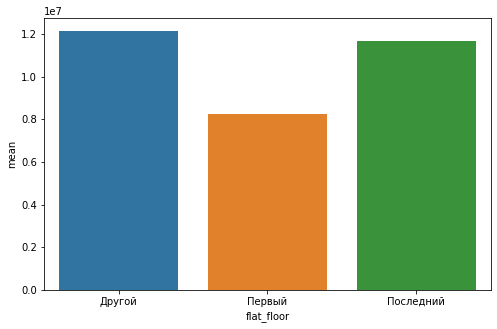

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=center_floor_price_pivot.index,
            y=center_floor_price_pivot['mean'],
            ax=ax)

<a id='research_center_price_corr_weekday'></a>
### Взаимосвязь стоимости недвижимости c днем продажи недвижимости ###

In [39]:
center_weekday_price_pivot = data_center.pivot_table(index='weekday', values='last_price', aggfunc=['sum', 'mean'])
center_weekday_price_pivot.columns = ['sum_last_price', 'mean']

<AxesSubplot:xlabel='weekday', ylabel='mean'>

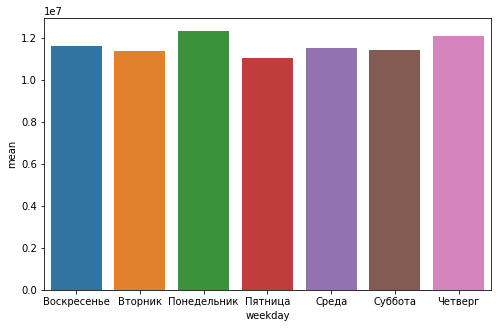

In [40]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=center_weekday_price_pivot.index,
            y=center_weekday_price_pivot['mean'],
            ax=ax)

<a id='research_center_price_corr_month'></a>
### Взаимосвязь стоимости недвижимости c месяцем продажи недвижимости ###

In [41]:
center_month_price_pivot = data_center.pivot_table(index='month', values='last_price', aggfunc=['sum', 'mean'])
center_month_price_pivot.columns = ['sum_last_price', 'mean']

<AxesSubplot:xlabel='month', ylabel='mean'>

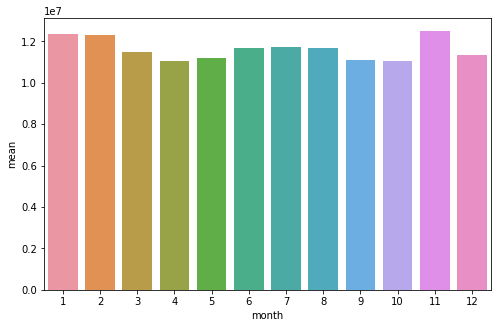

In [42]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=center_month_price_pivot.index,
            y=center_month_price_pivot['mean'],
            ax=ax)

<a id='research_center_price_corr_year'></a>
### Взаимосвязь стоимости недвижимости c годом продажи недвижимости ###

In [43]:
center_year_price_pivot = data_center.pivot_table(index='year', values='last_price', aggfunc=['sum', 'mean'])
center_year_price_pivot.columns = ['sum_last_price', 'mean']

<AxesSubplot:xlabel='year', ylabel='mean'>

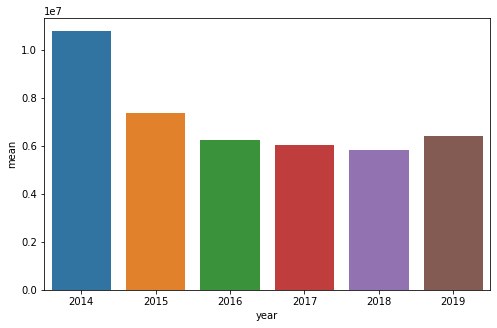

In [44]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=year_price_pivot.index,
            y=year_price_pivot['mean'],
            ax=ax)

## Результаты выявления факторов вляющих на стоимость недвижимости ##
1. Связь стоимости недвижимости с общей площадью:
    * наблюдается сильная положительная связь: рост площади ведет к росту стоимости
2. Связь стоимости недвижимости с количеством комнат:
    * наблюдается слабая положительная связь: рост количества ведет к росту стоимости.
    * при этом видна сильная положительная связь количества комнат с общей площадью
3. Связь стоимости недвижимости с расстоянием от центра:
    * наблюдается слабая отрицательная связь: увеличение расстояния ведет к уменьшению стоимости
    * связь слабее чем в целом по представленным населенным пунктам
4. Связь стоимости недвижимости с этажом:
    * недвижимость расположенная на первом этаже дешевле
5. Связь стоимости недвижимости с днем продажи:
    * стоимость недвижимости проданной в четверг выше чем в остальные дни.
    * вероятнее всего связано с малым количеством данных
6. Связь стоимости недвижимости с месяцем продажи:
    * стоимость недвижимости проданной в декабре выше чем в другие месяцы
    * вероятнее всего связано с малым количеством данных
7. Связь стоимости недвижимости с годом продажи:
    * с 2014 года стоимость недвижимости снижалась, в 2019 начался замечен небольшой рост стоимости

<a id='conclusion'></a>
# Вывод #
1. Факторы влияющие на стоимость недвижимости(в центре, остальной части города):
    * площадь. Положительное влияние.
    * количество комнат. Положительное влияние. Связан с площадью.
    * расстояние до центра. Отрицательное влияние.
    * высота потолков. Положительное влияние.
    * этаж. Недвижимость на первом этаже дешевле.
2. Дата продажи:
    * самая высокая стоимость в 2014 году
    * уменьшение стоимости до 2018 года
    * рост стоимости в 2019 году
    * странности:
        - стоимость недвижимости проданной в четверг выше чем в остальные дни
        - стоимость недвижимости в декабре выше чем остальные месяцы
3. Населенные пунты:
    * высокая стоимость недвижимости в:
        - Пушкине
        - Сестрорецк
        - Санкт-Петербург
    * низкая стоимость недвижимости в:
        - Ломоносове
        - Красном Селе
        - Колпино
